In [1]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

In [2]:
sys.path.insert(1, '/secure/projects/tacco/')
import tacco as tc

In [3]:
sys.path.insert(1, '/secure/projects/HTAPP_MBC/src/spatial')
from spatial_utils import *

In [4]:
plots_dir=out_dir_base+"/plots/"
os.makedirs(plots_dir, exist_ok=True)

In [5]:
sample_sheet=pd.read_csv(codeDir+"/meta/sampletracking_HTAPP_MBC_spatial.csv")

In [6]:
#These identifiers are set as defaults in many functions. If names are changed, this has to be adapted when calling the functions.
ct_column='cell_type'
sm_methods=["slide_seq","merfish","merfish_bin","exseq","exseq_bin","codex"] #spatial mathod names are hard-coded for now because some methods need special treatments. Can be fixed by giving eatch method it's own variable.
sc_method="scRNAseq"
all_methods=[sc_method,*sm_methods]
all_methods

['scRNAseq',
 'slide_seq',
 'merfish',
 'merfish_bin',
 'exseq',
 'exseq_bin',
 'codex']

In [7]:
run_samples=list(filter(lambda a: not a in [''], list(sample_sheet['sample'].unique()))) 
run_samples

['HTAPP-944-SMP-7479',
 'HTAPP-895-SMP-7359',
 'HTAPP-880-SMP-7179',
 'HTAPP-878-SMP-7149',
 'HTAPP-812-SMP-8239',
 'HTAPP-514-SMP-6760',
 'HTAPP-982-SMP-7629',
 'HTAPP-997-SMP-7789',
 'HTAPP-917-SMP-4531',
 'HTAPP-853-SMP-4381',
 'HTAPP-313-SMP-932',
 'HTAPP-330-SMP-1082',
 'HTAPP-783-SMP-4081',
 'HTAPP-364-SMP-1321',
 'HTAPP-213-SMP-6752']

HTAPP-944-SMP-7479
HTAPP-895-SMP-7359
HTAPP-880-SMP-7179
HTAPP-878-SMP-7149
HTAPP-812-SMP-8239
HTAPP-514-SMP-6760
HTAPP-982-SMP-7629
HTAPP-997-SMP-7789
HTAPP-917-SMP-4531
HTAPP-853-SMP-4381
HTAPP-313-SMP-932
HTAPP-330-SMP-1082
HTAPP-783-SMP-4081
HTAPP-364-SMP-1321
HTAPP-213-SMP-6752


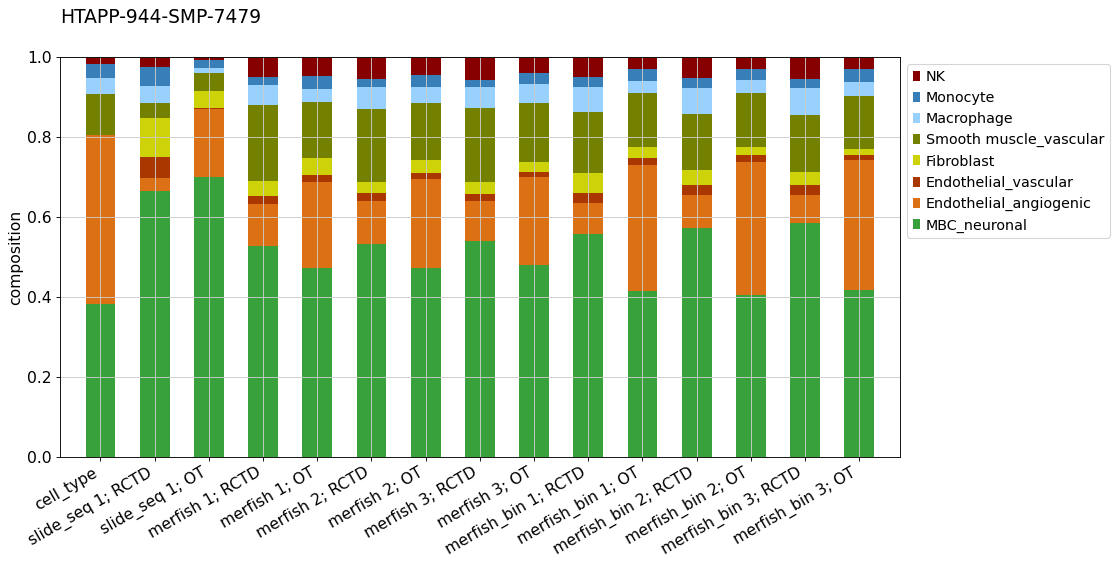

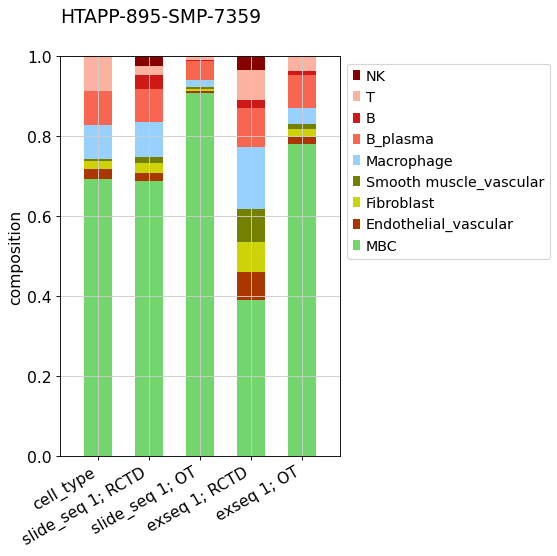

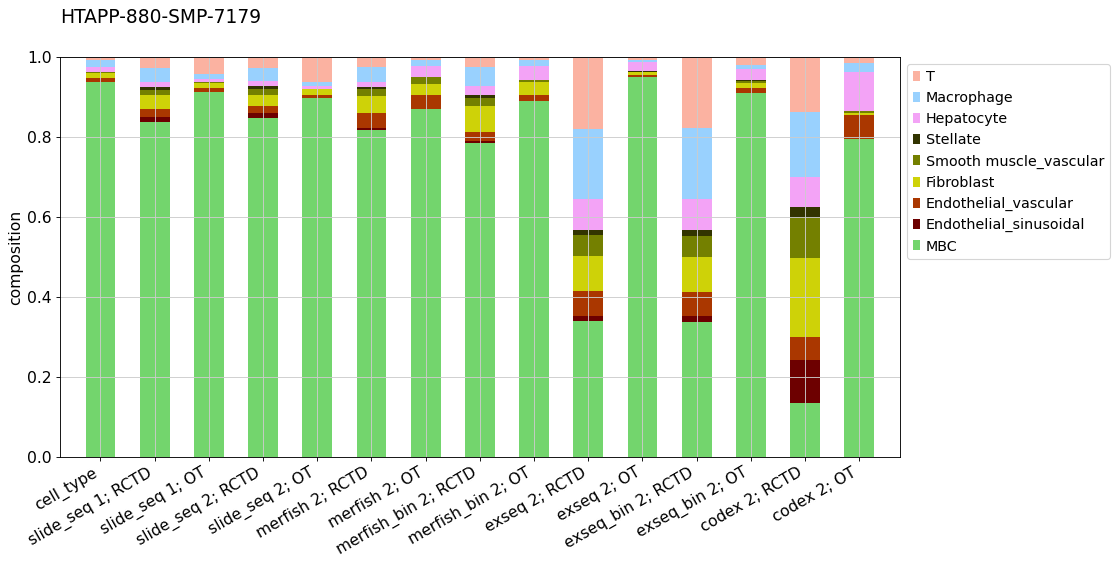

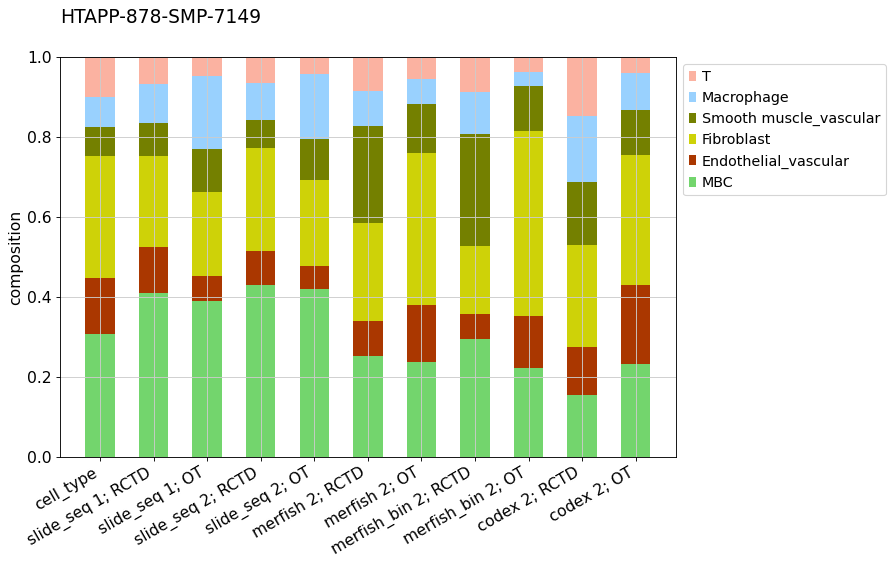

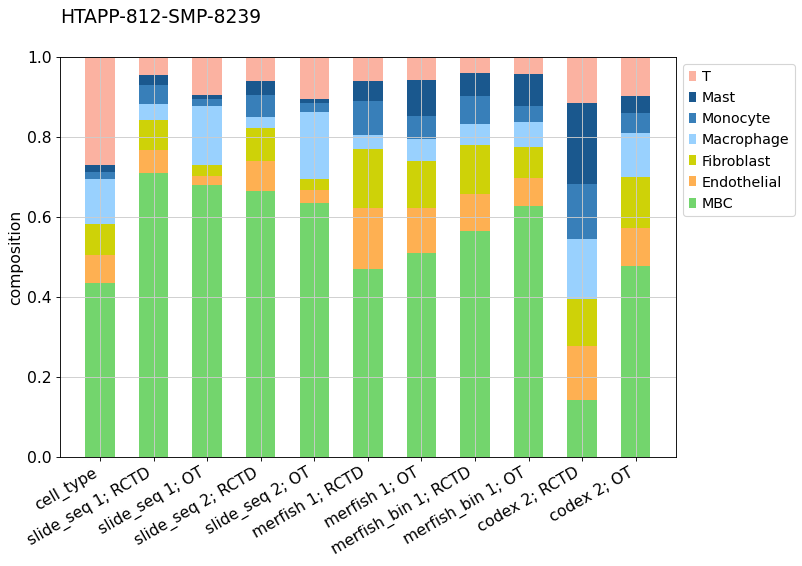

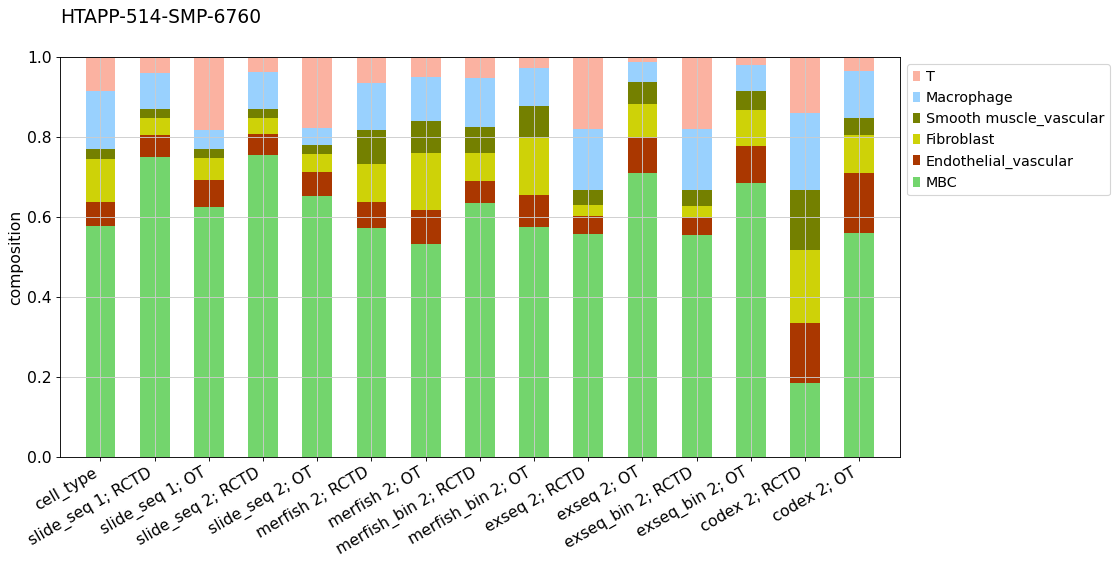

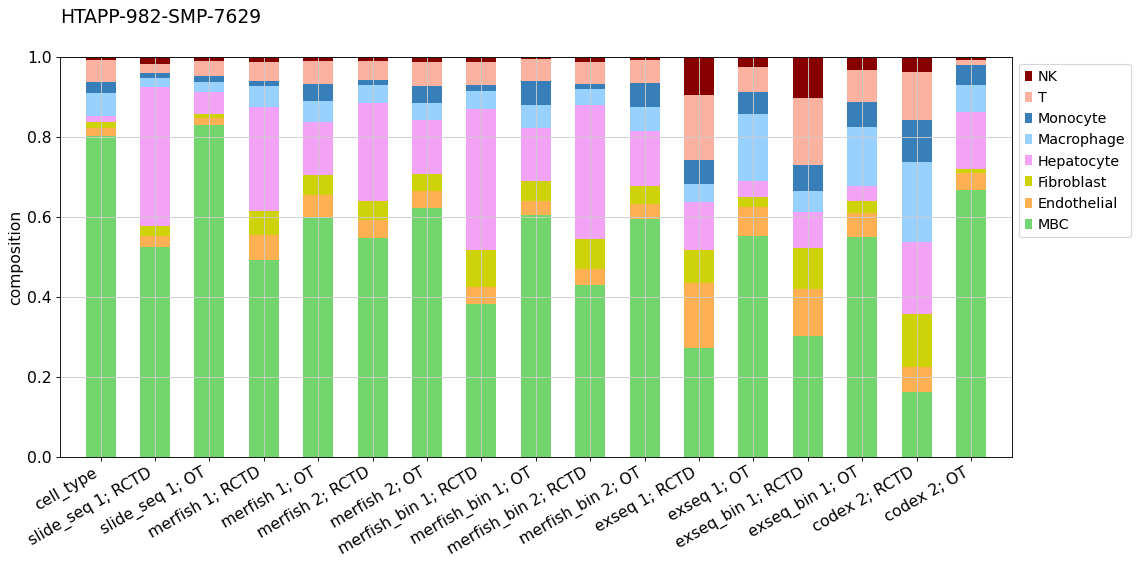

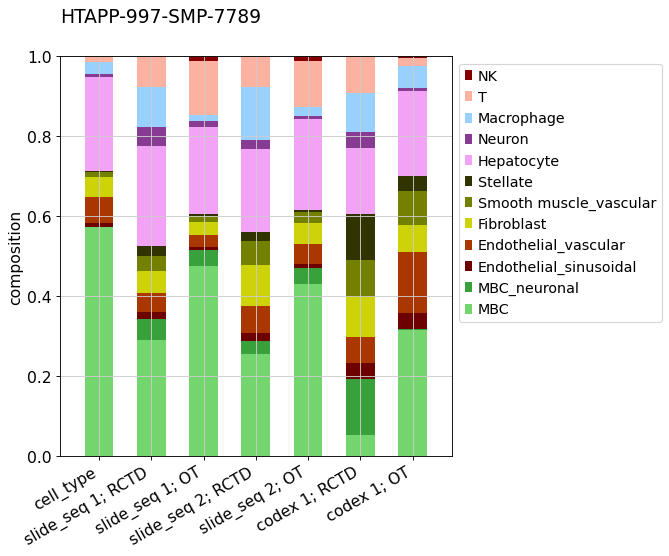

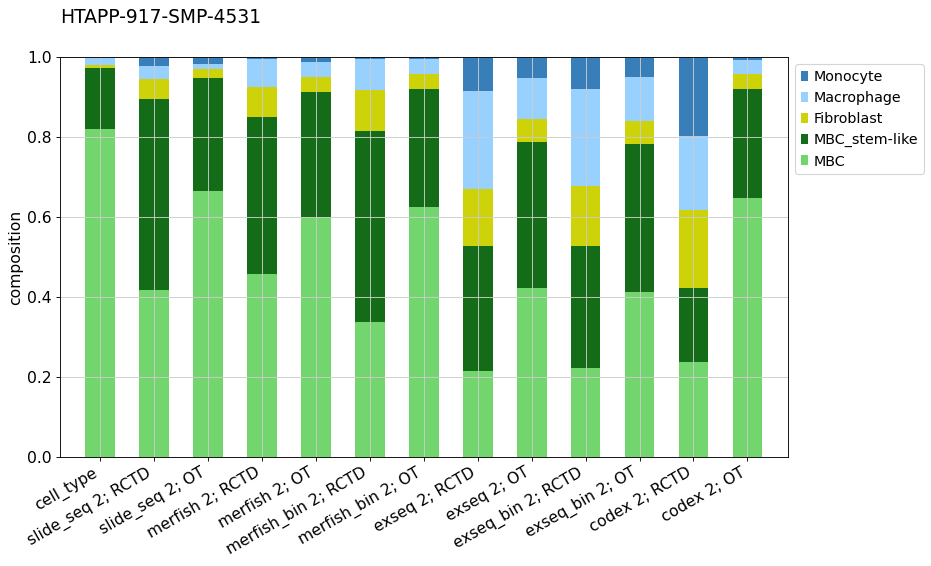

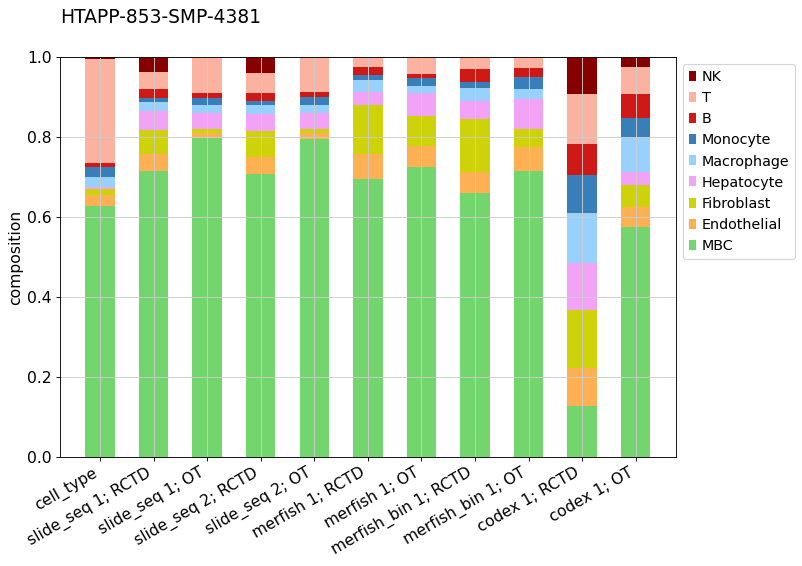

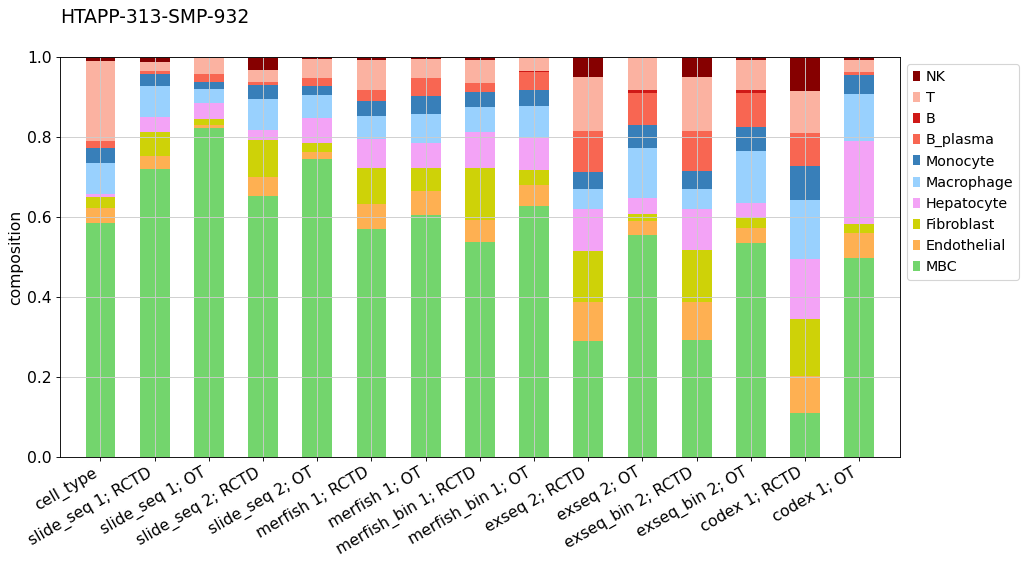

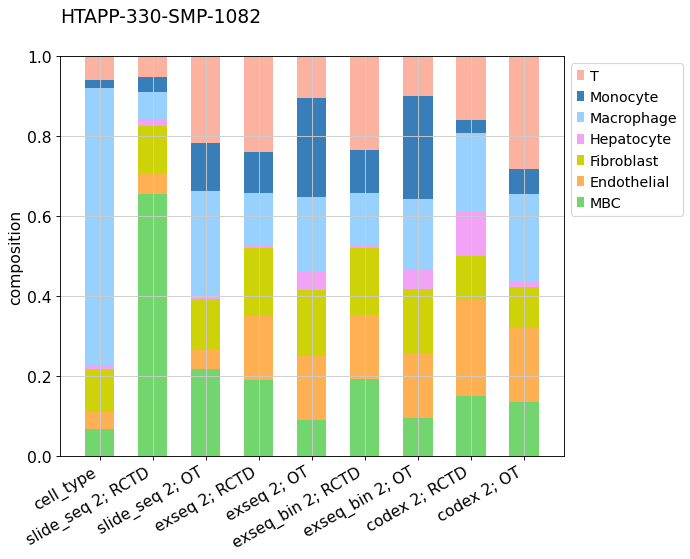

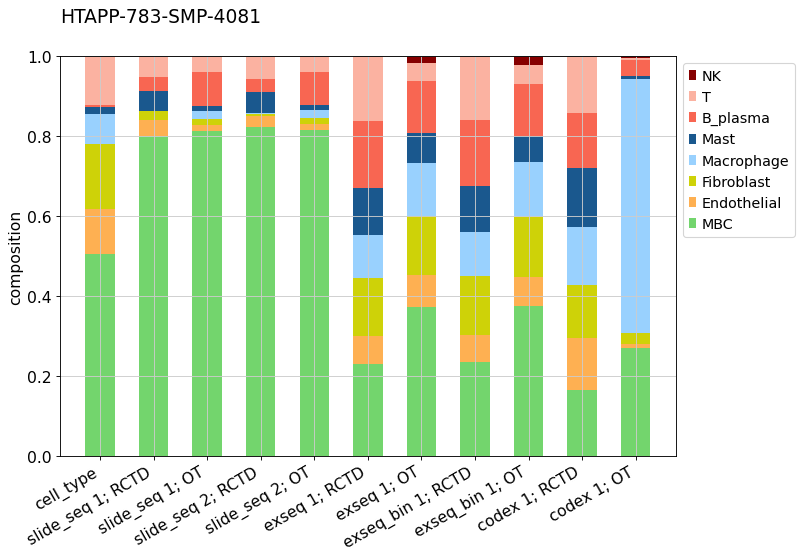

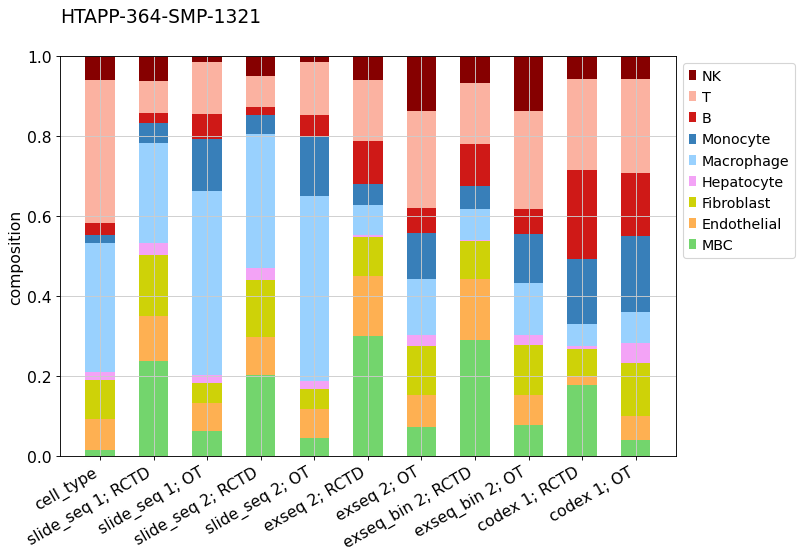

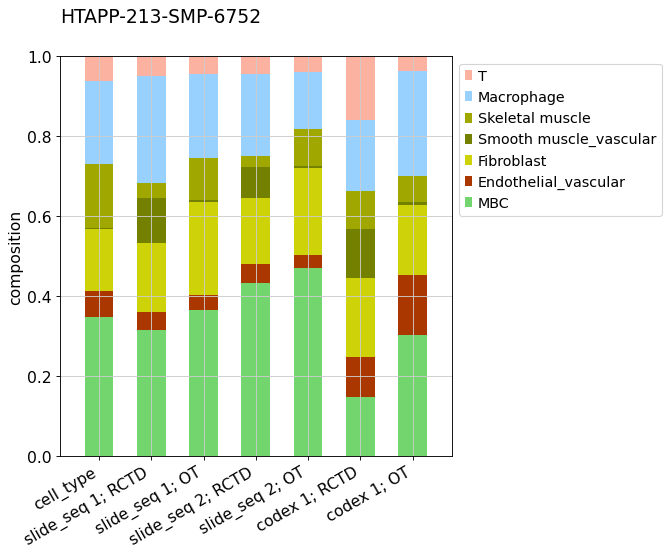

In [8]:
for sample in run_samples:
    print(sample)
    out_dir=out_dir_base+sample 
    adatas=get_and_process_data(sample,data_dir,out_dir,methods=all_methods,process=False,verbose=False)
    sel_colors=colors[colors.index.isin(adatas[sc_method].obs[ct_column])]
    fig = tc.pl.frequency_bar(replicate_splitter(adatas[~adatas.index.isin(['scRNAseq'])]), keys=['RCTD','OT'], colors=sel_colors, 
                              show_only=None, axsize=None, basis_adata=adatas[sc_method], basis_keys=ct_column, horizontal=False, reads=False);
    figheight = fig.get_size_inches()[1]
    x,y = fig.axes[0].transData.inverted().transform(fig.axes[0].transAxes.transform((0,1))+np.array([0,30]))
    fig.axes[0].text(x, y, sample, ha="left", va="bottom", fontsize='large')
    fig.savefig(f'{plots_dir}{sample}_allannot_fractions.pdf',bbox_inches='tight')

HTAPP-944-SMP-7479
HTAPP-895-SMP-7359
HTAPP-880-SMP-7179
HTAPP-878-SMP-7149
HTAPP-812-SMP-8239
HTAPP-514-SMP-6760
HTAPP-982-SMP-7629
HTAPP-997-SMP-7789
HTAPP-917-SMP-4531
HTAPP-853-SMP-4381
HTAPP-313-SMP-932
HTAPP-330-SMP-1082
HTAPP-783-SMP-4081
HTAPP-364-SMP-1321
HTAPP-213-SMP-6752


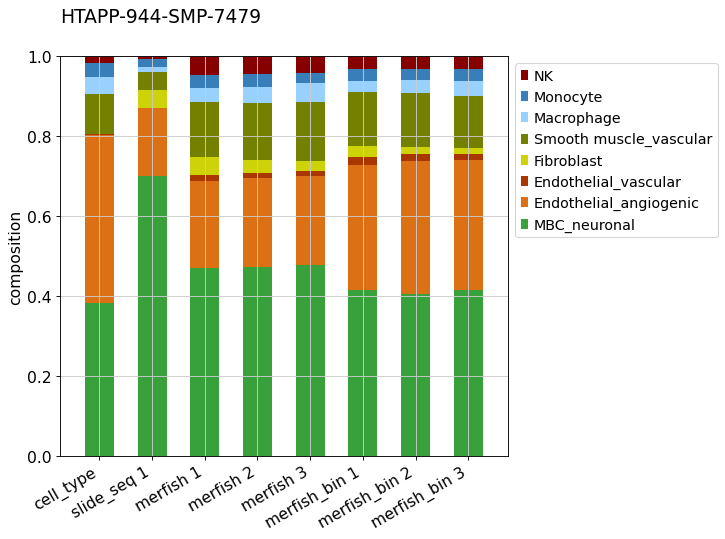

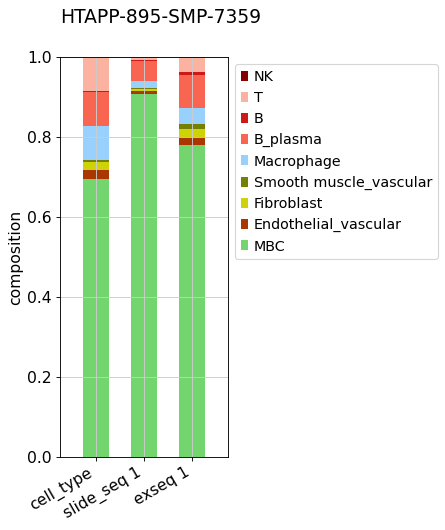

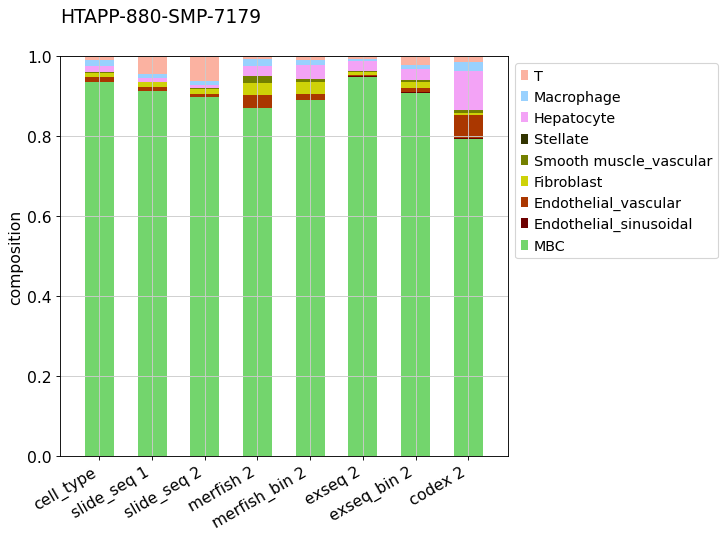

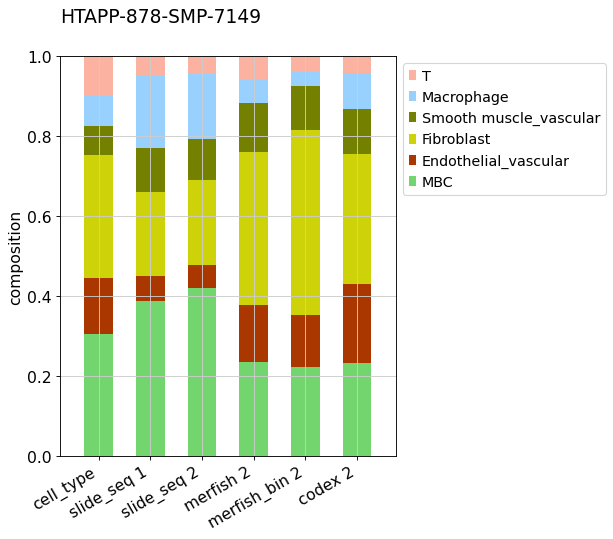

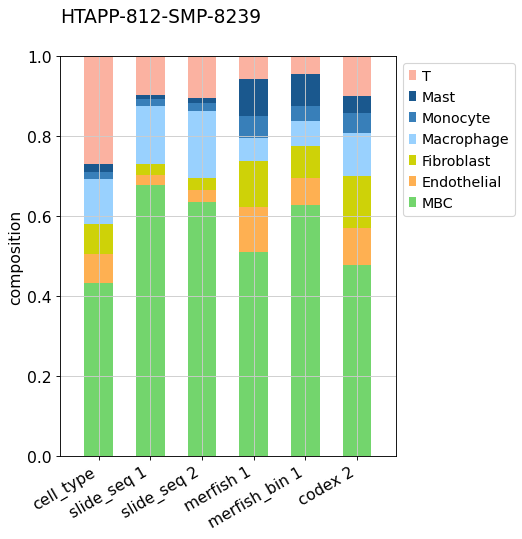

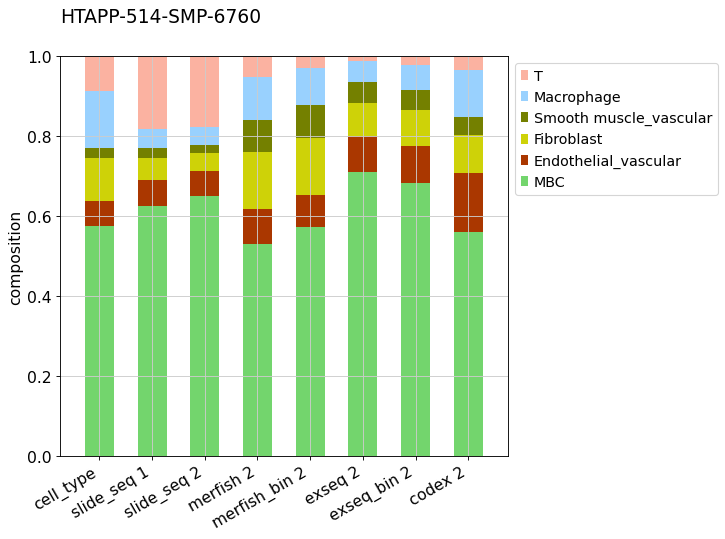

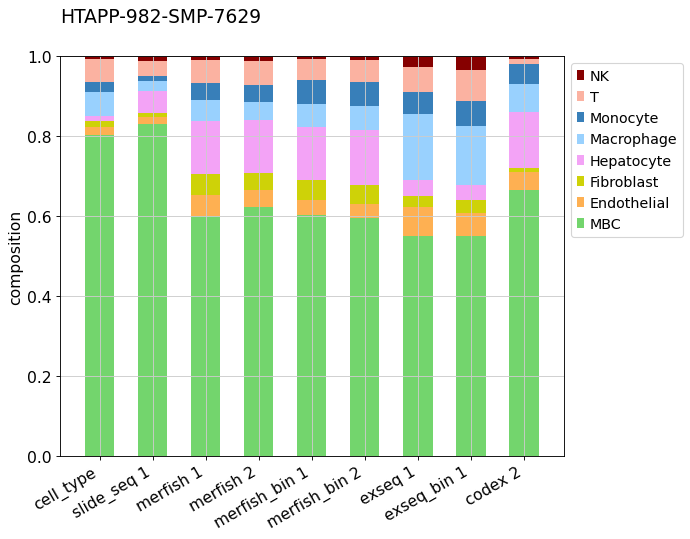

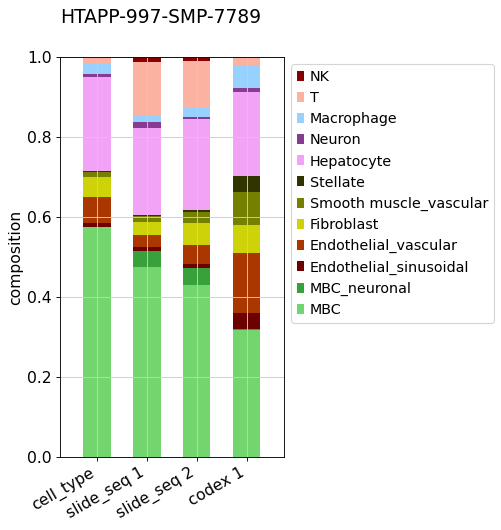

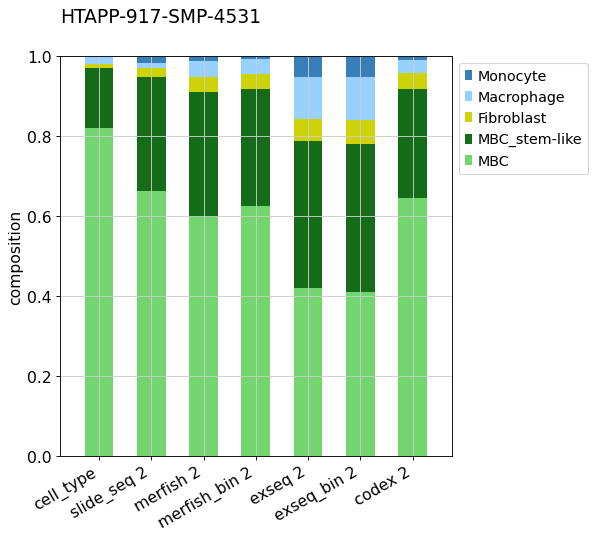

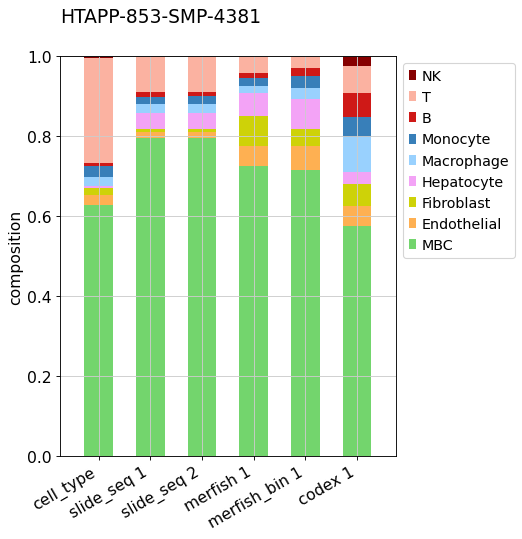

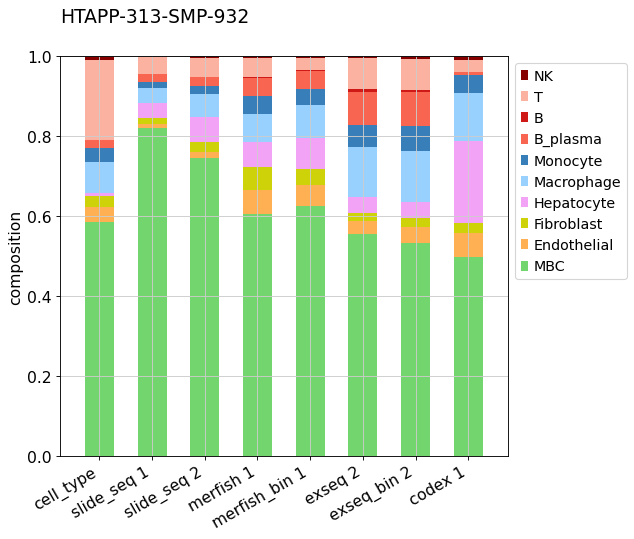

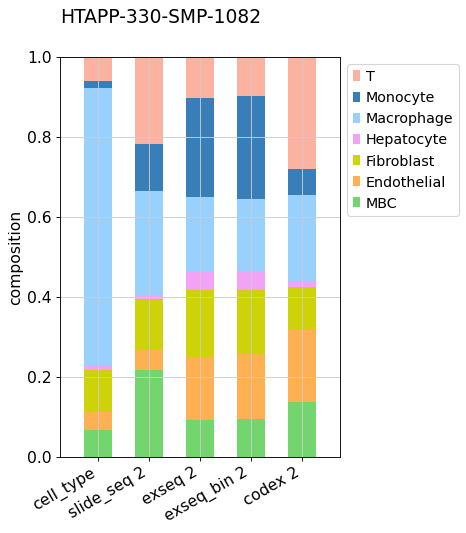

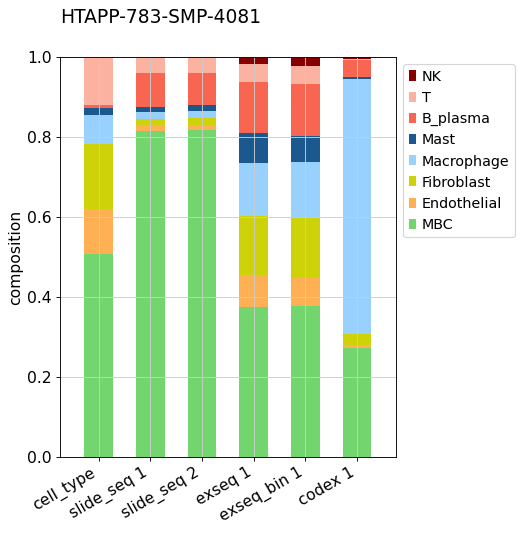

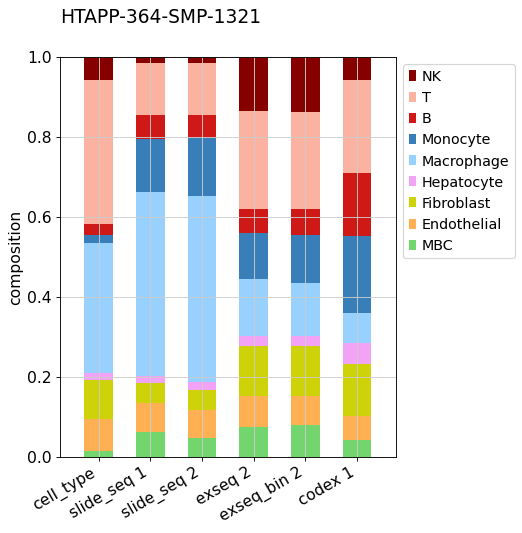

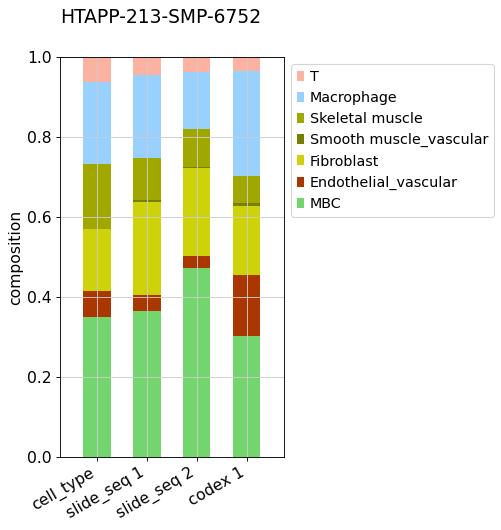

In [10]:
for sample in run_samples:
    print(sample)
    out_dir=out_dir_base+sample 
    adatas=get_and_process_data(sample,data_dir,out_dir,methods=all_methods,process=False,verbose=False)
    sel_colors=colors[colors.index.isin(adatas[sc_method].obs[ct_column])]
    fig = tc.pl.frequency_bar(replicate_splitter(adatas[~adatas.index.isin(['scRNAseq'])]), keys=['OT'], colors=sel_colors, 
                              show_only=None, axsize=None, basis_adata=adatas[sc_method], basis_keys=ct_column, horizontal=False, reads=False, method_labels={'OT':''});
    figheight = fig.get_size_inches()[1]
    x,y = fig.axes[0].transData.inverted().transform(fig.axes[0].transAxes.transform((0,1))+np.array([0,30]))
    fig.axes[0].text(x, y, sample, ha="left", va="bottom", fontsize='large');
    fig.savefig(f'{plots_dir}{sample}_fractions_OT.pdf',bbox_inches='tight');

HTAPP-944-SMP-7479
HTAPP-895-SMP-7359
HTAPP-880-SMP-7179
HTAPP-878-SMP-7149
HTAPP-812-SMP-8239
HTAPP-514-SMP-6760
HTAPP-982-SMP-7629
HTAPP-997-SMP-7789
HTAPP-917-SMP-4531
HTAPP-853-SMP-4381
HTAPP-313-SMP-932
HTAPP-330-SMP-1082
HTAPP-783-SMP-4081
HTAPP-364-SMP-1321
HTAPP-213-SMP-6752


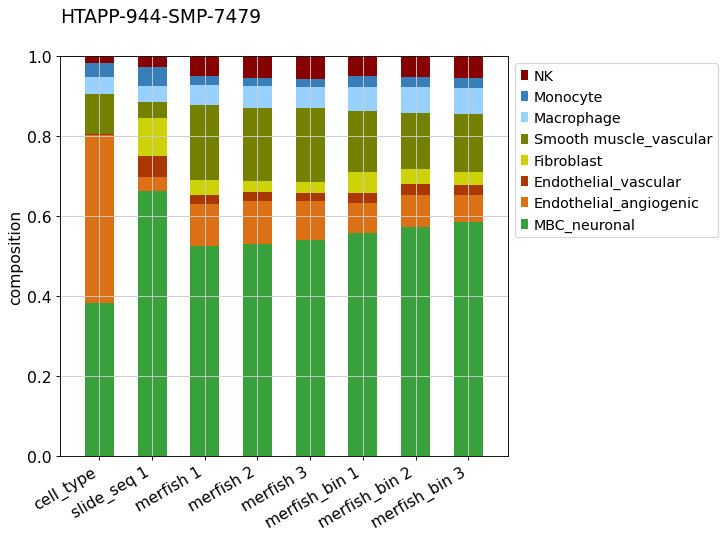

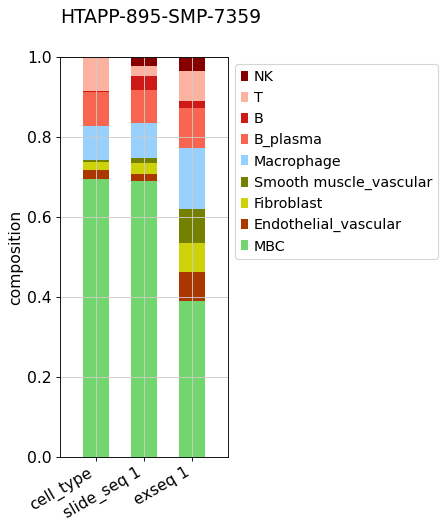

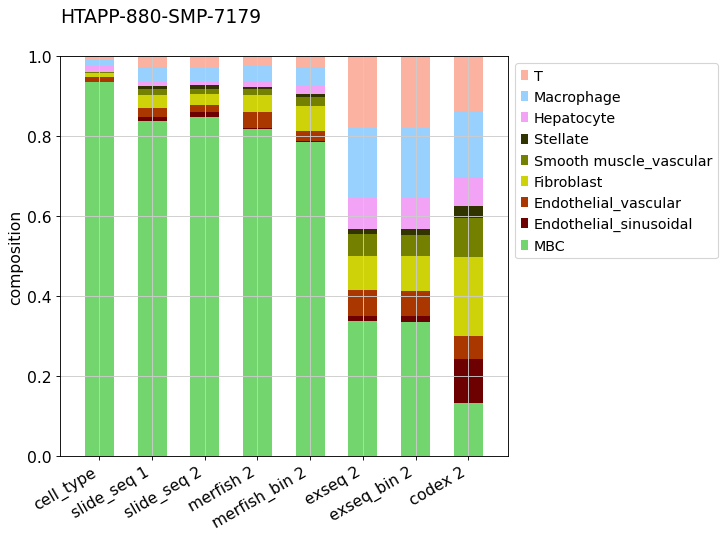

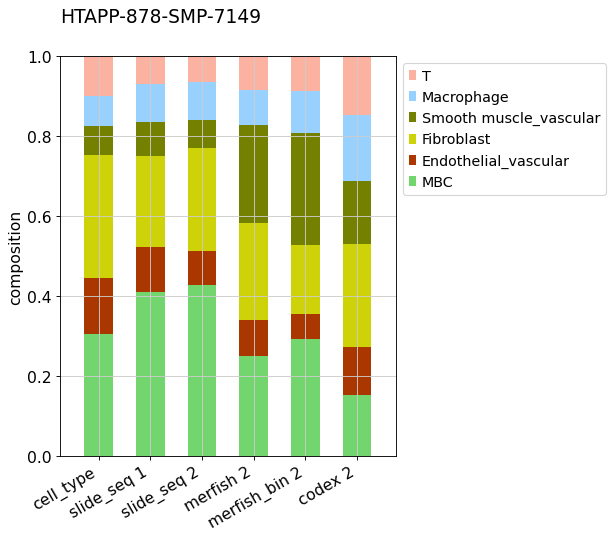

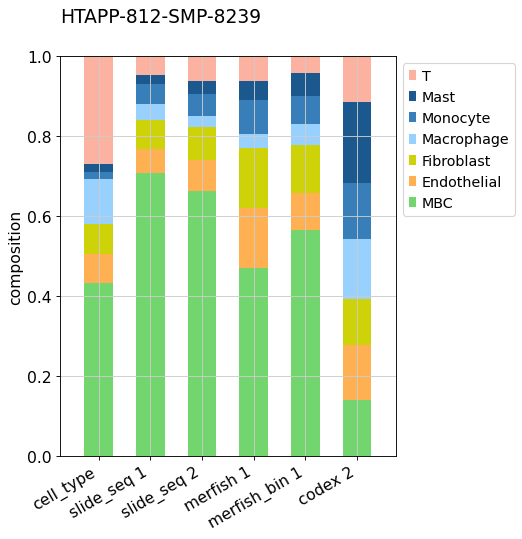

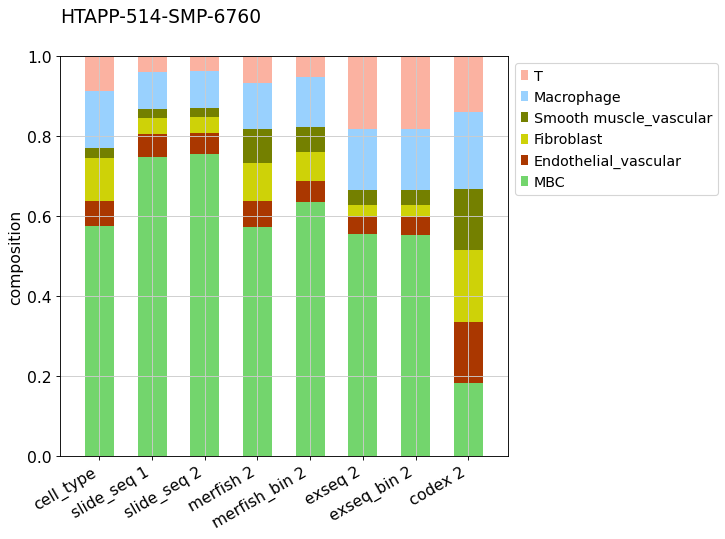

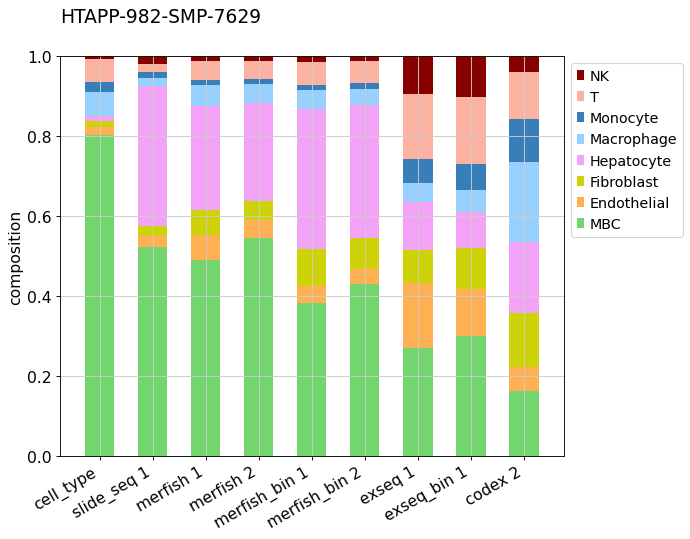

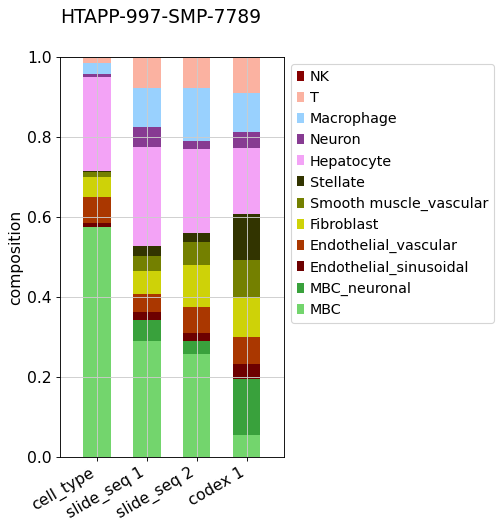

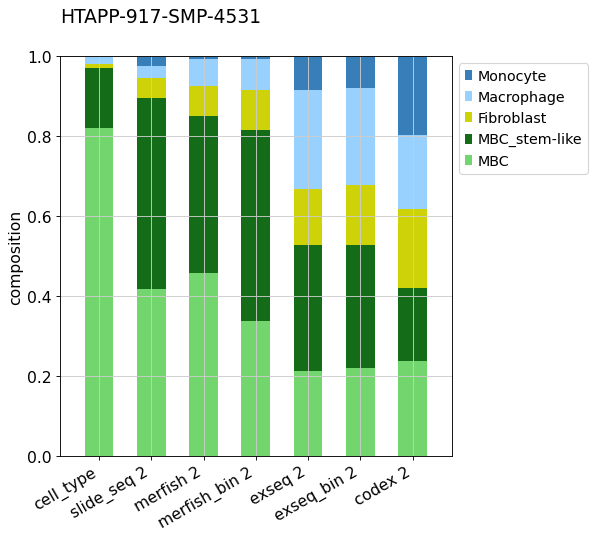

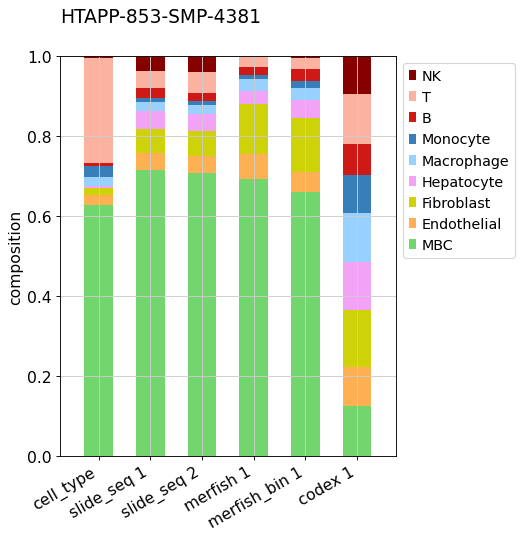

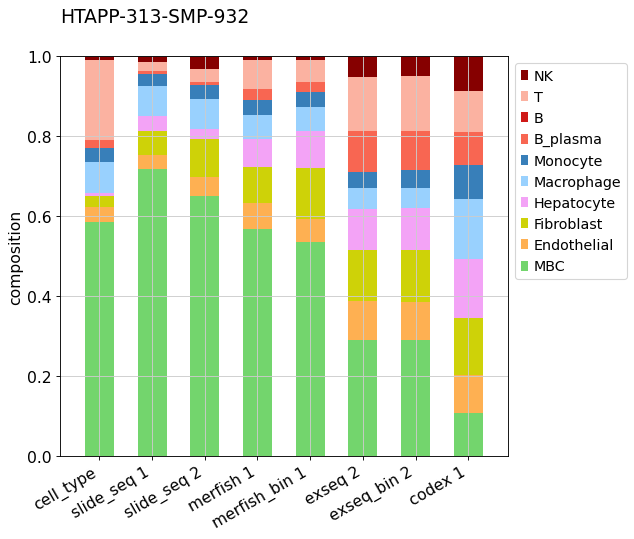

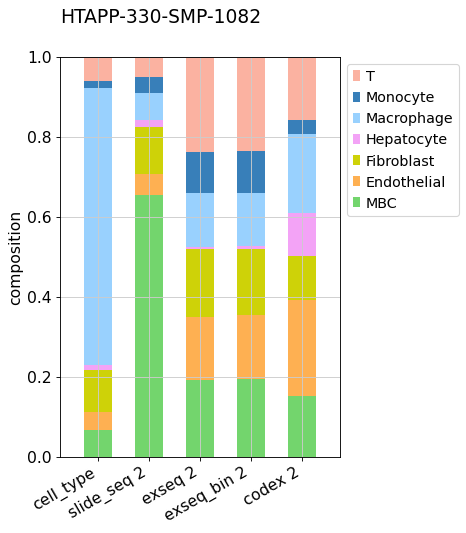

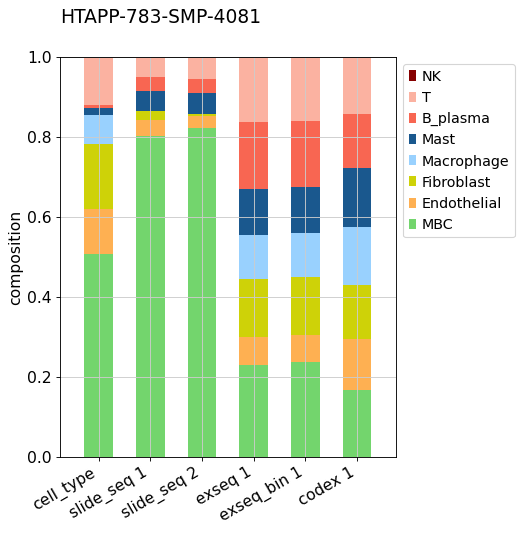

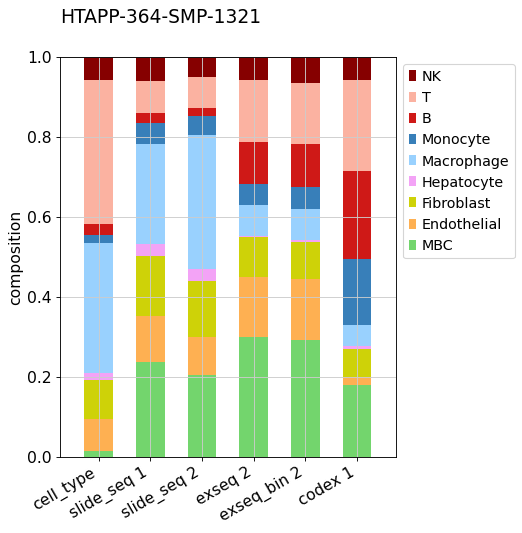

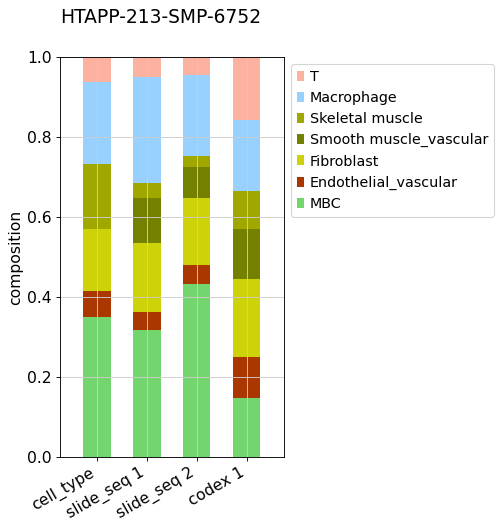

In [11]:
for sample in run_samples:
    print(sample)
    out_dir=out_dir_base+sample 
    adatas=get_and_process_data(sample,data_dir,out_dir,methods=all_methods,process=False,verbose=False)
    sel_colors=colors[colors.index.isin(adatas[sc_method].obs[ct_column])]
    fig = tc.pl.frequency_bar(replicate_splitter(adatas[~adatas.index.isin(['scRNAseq'])]), keys=['RCTD'], colors=sel_colors, 
                              show_only=None, axsize=None, basis_adata=adatas[sc_method], basis_keys=ct_column, horizontal=False, reads=False, method_labels={'RCTD':''});
    figheight = fig.get_size_inches()[1]
    x,y = fig.axes[0].transData.inverted().transform(fig.axes[0].transAxes.transform((0,1))+np.array([0,30]))
    fig.axes[0].text(x, y, sample, ha="left", va="bottom", fontsize='large');
    fig.savefig(f'{plots_dir}{sample}_fractions_RCTD.pdf',bbox_inches='tight');

In [ ]:
#todo: merge pdfs (sofar only merge pngs)